<a href="https://colab.research.google.com/github/jacobpark1919/connect-four-python/blob/main/ps5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS541: Applied Machine Learning, Fall 2024, Problem Set 5

### _Note: Do not delete or add blocks, do not change the function names. If you do this the autograder won't run properly and you might get a 0. Avoid using global variables inside your function. Failing to define your variables correctly could result in a score of 0._


Problem set 5 is due in Gradescope on **Nov 19 at 11:59pm**.
All the questions are in this jupyter notebook file. There are four questions in this assignment, each of which could have multiple parts and consists of a mix of coding and short answer questions. This assignment is worth a total of **100 points** (**82.5 pts** coding, and **17.5 pts** short answer).  There is a bonus question at the end which is worth an extra 10 pts but your maximum final score will be capped at 100 if you scored beyond 100. Note that each individual pset contributes the same amount to the final grade regardless of the number of points it is worth.

After completing these questions you will need to covert this notebook into a .py file named **ps5.py** and a pdf file named **ps5.pdf** in order to submit it (details below).

**Submission instructions:** please upload your completed solution files to Gradescope by the due date. **Make sure you have run all code cells and rendered all markdown/Latex without any errors.**

There will be two separate submission links for the assignment:
1. Submit **ps5.py** to `PS5-Code`
2. Submit a single `.pdf` report that contains your work for all written questions to `PS5`. You can type your responses in LaTeX, or any other word processing software.  You can also hand write them on a tablet, or scan in hand-written answers. If you hand-write, please make sure they are neat and legible. If you are scanning, make sure that the scans are legible. Lastly, convert your work into a `PDF`. You can use Jupyter Notebook to convert the formats:
  + Convert to PDF file: Go to File->Download as->PDF
  + Convert py file: Go to File->Download as->py\
You can take a look at an example [here](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps1/convert_py.gif)

  Your written responses in the PDF report should be self-contained. It should include all the output you want us to look at. You will not receive credit for any results you have obtained, but failed to include directly in the PDF report file.  Please tag the reponses in your PDF with the Gradescope questions outline  as described in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0).
  



**Assignment Setup**

You are strongly encouraged to use [Google Colab](https://colab.research.google.com/) for this assignment.

If you would prefer to setup your code locally on your own machine, you will need [Jupyter Notebook](https://jupyter.org/install#jupyter-notebook) or [JupyterLab](https://jupyter.org/install#jupyterlab) installation. One way to set it up is to install “Anaconda” distribution, which has Python (you should install python version >= 3.9 as this notebook is tested with python 3.9), several libraries including the Jupyter Notebook that we will use in class. It is available for Windows, Linux, and Mac OS X [here](https://docs.conda.io/en/latest/miniconda.html).

If you are not familiar with Jupyter Notebook, you can follow [this blog](https://realpython.com/jupyter-notebook-introduction/) for an introduction.  After developing your code using Jupyter, you are encouraged to test it on Google Colab to ensure it works in both settings.


You cannot use packages other than the ones already imported in this assignment.

**Jupyter Tip 1**: To run a cell, press `Shift+Enter` or click on "play" button above. To edit any code or text cell [double] click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

**Jupyter Tip 2**: Use shortcut "Shift + Tab" to show the documentation of a function in Jupyter Notebook/ Jupterlab. Press Shift then double Tab (i.e., press Tab twice) to show the full documentation.\
For example, type `sum(` then Shift + Tab to show the documentation for the function, as shown in this the picture below.

In [1]:
## import some libraries
import numpy as np
from typing import Tuple, List, Dict
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from IPython.display import display
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

# **Question 1.** Autoencoder (*45 total points*)

In this question, you will build and train an autoencoder model using the MNIST dataset. The MNIST dataset is a collection grayscale images of handwritten digits ranging from 0 to 9 commonly used for image classification tasks.

An autoencoder is a neural network that learns to compress the input data into a lower-dimensional representation (encoding) and then reconstruct it back to its original form (decoding). It consists of the following two major components:

**Encoder**: compresses the input images into lower-dimensional representation.

**Decoder**: takes the encoded representation and reconstructs an output as close as possible to the original input image.


## **1.1 Code:** Data Transformation *(2.5 pts)*

For the following sections, we will work on [MNIST](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) dataset.



First, let's download and preprocess the dataset

In [2]:
def question_1_1() -> transforms.Compose:
    """
    Create and return a transformation pipeline for image preprocessing.
    """
    # Write your code in this block -----------------------------------------------------------

    ## Step 1: Use transforms.Compose
    # 1. resize images to 28x28 pixels.
    # 2. convert the image to a PyTorch tensor.
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor()
    ])

    ## Return the transformation pipeline
    return transform
    # End of your code -----------------------------------------------------------



We will now create the dataloaders for training and testing.

In [3]:

# Load the MNIST dataset for training and testing using batch size of 16
transform = question_1_1()
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 20.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 614kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 5.44MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.54MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## **1.2 Code:** Constructing Autoencoder *(5 pts)*

In [4]:
import torch.nn as nn
from torch import Tensor

class Autoencoder(nn.Module):
    def __init__(self, encoding_dim: int):

        super().__init__()

        # Write your code in this block -----------------------------------------------------------

        # Initialize self.encoder and self.decoder based on the given output
        # (note the dimension for in_features and out_features)

        # Construct encoder using following steps:
        # 1. Apply a linear layer with 784 input features and 128 output features.
        # 2. Add a ReLU activation function.
        # 3. Apply a second linear layer that reduces the representation from 128 features to encoding_dim
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim)
        )


        # Construct decoder using following steps:
        # 1. Apply a linear layer with encoding_dim features and 128 output features.
        # 2. Add a ReLU activation function.
        # 3. Apply a second linear layer from 128 features to 784 features
        # 4. Apply a sigmoid layer.
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x: Tensor) -> Tensor:
        """
        Forward pass for the autoencoder.
        x: Input tensor of shape (batch_size, 1, 28, 28).
        Returns the reconstructed tensor of the same shape (batch_size, 1, 28, 28)..
        """
        # Flatten the input image to shape (batch_size,28*28)
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(x.size(0), 1, 28, 28)

        return decoded
        # End of your code ------------------------------------------------------------------------

# Example of instantiating the model
encoding_dim = 64
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


For training we need to first create `model` and set its device. We will use GPU if it's available, otherwise CPU.  For `optimizer` we will use Adam and set the initial learning rate as 0.001.

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoding_dim = 64
model = Autoencoder(encoding_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

## **1.3 Code:** Training Autoencoder *(5 pts)*

Now, let us write the function to train an autoencoder model.

In [6]:
def question_1_3(model: nn.Module, dataloader: DataLoader, criterion, optimizer, epochs) -> None:
    """
    Train an autoencoder model on a given dataset.

    Args:
    - model (nn.Module): The autoencoder model to be trained
    - dataloader (DataLoader): Dataloader for trianing
    - criterion: Loss function
    - optimizer: Optimizer
    - epochs: NUmber of trianing epochs

    """


    # Write your code in this block -----------------------------------------------------------
    ## Set training mode
    model.train()

    ## Loop through each epoch
    for epoch in range(epochs):
        total_loss = 0.0
        for images, _ in dataloader:
            images = images.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, images)
            # Zero the gradients, backpropagate, and update the weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update the loss
            total_loss += loss.item()

        # Compute average loss over the epoch  and print out the loss
        avg_loss = total_loss / len(dataloader)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
    # End of your code ------------------------------------------------------------------------


## **1.4 Short answer:**  Deciding Loss Function *(2.5 pts)*

When training the model, experiment with different loss functions as the criterion. Choose the most suitable loss function for the task and explain why it is the best choice.

In [7]:
# Write your code in this block -----------------------------------------------------------
# invoke question_1_3 here, try out at least 2 loss functions, and leave one for the test set below


# MSE
criterion = nn.MSELoss()

epochs = 5
train_model = question_1_3(model, train_loader, criterion, optimizer, epochs)

# Cross Entropy

criterion = nn.BCELoss()

epochs = 5
train_model = question_1_3(model, train_loader, criterion, optimizer, epochs)

Epoch [1/5], Loss: 0.0205
Epoch [2/5], Loss: 0.0087
Epoch [3/5], Loss: 0.0066
Epoch [4/5], Loss: 0.0056
Epoch [5/5], Loss: 0.0050
Epoch [1/5], Loss: 0.0760
Epoch [2/5], Loss: 0.0742
Epoch [3/5], Loss: 0.0735
Epoch [4/5], Loss: 0.0730
Epoch [5/5], Loss: 0.0725


Write your answer in this block

**Answer:**

Despite the higher loss, I believe in this scenario binary cross entropy is the better choice as the loss function. MNIST images are grayscale with pixel values normalized from 0 to 1, making them great for probabilitstic interpretation. This is where BCE works best. BCE loss treats these normalized pixel values as probability and effectively measures the difference between the predicted and actual probabilties. MSE on the other hand is less sensitive to small pixel intensity differences and may not capture the fine details in binary data like BCE would.

Now, let us evaluate the performance of the autoencoder using the test set.

In [8]:
def evaluate_model(model: nn.Module, dataloader: DataLoader) -> float:
    """
    Evaluate an autoencoder model on a given dataset.

    Args:
    - model (nn.Module): The autoencoder model to be evaluated
    - dataloader (DataLoader): Dataloader for evaluation

    Returns:
    - float: Average loss over the evaluation dataset
    """

    ## Set the model to evaluation mode
    model.eval()
    total_loss = 0.0

    ## Disable gradient calculation
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            outputs = model(images)
            loss = criterion(outputs, images)

    # Calculate total_loss
            total_loss += loss.item()

    # Calculate average loss over the entire evaluation dataset and print out the loss
    avg_loss = total_loss / len(dataloader)
    print(f"Test Loss: {avg_loss:.4f}")



    return avg_loss


In [9]:
criterion = nn.MSELoss()
question_1_3(model, train_loader, criterion, optimizer, epochs=5)
evaluate_model(model, test_loader)

Epoch [1/5], Loss: 0.0033
Epoch [2/5], Loss: 0.0036
Epoch [3/5], Loss: 0.0035
Epoch [4/5], Loss: 0.0035
Epoch [5/5], Loss: 0.0034
Test Loss: 0.0034


0.0034235835403203965

To visualize the performance of the current autoencoder run the following block:

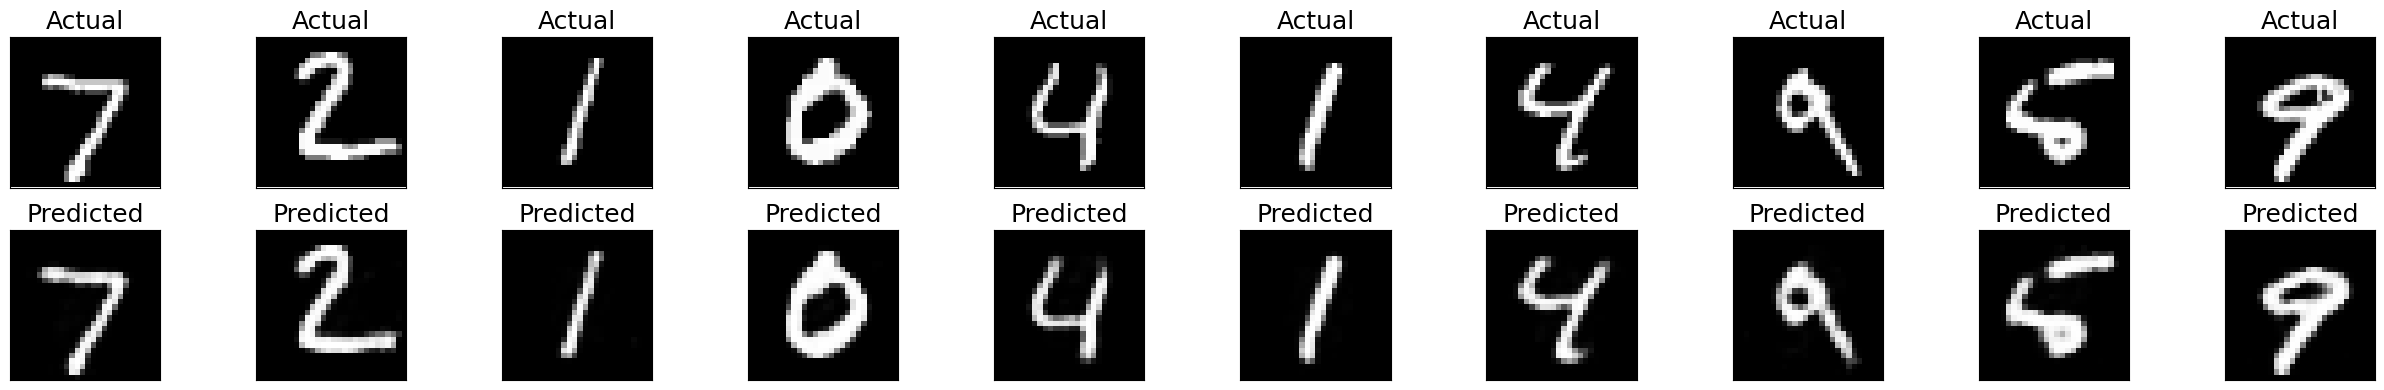

In [10]:
import matplotlib.pyplot as plt
dataiter = iter(test_loader)
images, labels = next(dataiter)

images_flatten = images.view(images.size(0), -1)
output = model(images_flatten.to(device))
images = images.cpu().numpy()


output = output.view(16, 1, 28, 28)
output = output.detach().cpu().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25, 4))

row_titles = ["Actual", "Predicted"]
for images_set, row, title in zip([images, output], axes, row_titles):
    for img, ax in zip(images_set, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.set_title(title, fontsize=18)  # Set "Actual" or "Predicted" as title for each subfigure
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

## **1.5 Code:** Adding Layers to Autoencoder *(10 pts)*
Try **three** different ways of adding a layer to the encoder and a layer to the decoder and retrain it. Do they get better? Discuss what you learn from the results.

In [11]:
## -- ! code required --your solution(s)
class Autoencoder_new(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder_new, self).__init__()

        # Try different ways of adding layers to your encoder and decoder
        self.encoder = nn.Sequential(
        # Write your code in this block -----
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim)
        # End of your code --------
        )

        self.decoder = nn.Sequential(
        # Write your code in this block -----
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        # End of your code --------
        )

    def forward(self, x):
        # Write your code in this block -----
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(x.size(0), 1, 28, 28)
        # End of your code --------

        return decoded


encoding_dim = 64
model_new = Autoencoder_new(encoding_dim).to(device)
print(model_new)
question_1_3(model_new, train_loader, criterion, optimizer, epochs=5)
evaluate_model(model_new, test_loader)

Autoencoder_new(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=784, bias=True)
    (5): Sigmoid()
  )
)
Epoch [1/5], Loss: 0.2316
Epoch [2/5], Loss: 0.2316
Epoch [3/5], Loss: 0.2316
Epoch [4/5], Loss: 0.2316
Epoch [5/5], Loss: 0.2316
Test Loss: 0.2317


0.23170064425468445

Write your answer in this block

**Answer:**

I tried multiple variations.

The first variation I tried (and the one that is in the code block above this cell), is a simple encoder decoder architecture with two fully connected laers in each module, also using a ReLU activation for intermediate layers and sigmoid for outut to normalize pixel intensities between 0 and 1.

The second variation was a deeper architecture with additional layers in both the encoder and deocder. I also did some research on Google and attempted to use LeakyReLU activation.

The third variation I tried was the same as the first variation, but an extra fully connected layers (so three in total). The decoder followed a similar structure.

Interestingly enough, I actually found that the first variation, and simplest model, had the least amount of loss. It was also the fastest, so out of these three variations it was the best in this situation. I believe that the second and third variations did not perform as well because it was overfitting on the training data. These models were actually too complex, and they were learning the training data too deeply, to the point where the model would not generalize well to new testing data.

## **1.6 Code:** Decoding Training Data *(10 pts)*

Determine the mean and covariance of the samples from our training data. Now
draw 10 random samples from a normal distribution with that mean and
covariance, and feed these samples into the decoder. Do the results look
like images?

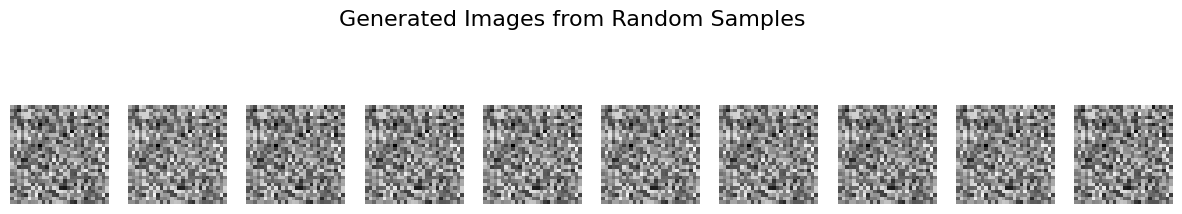

In [12]:
## -- ! code required --your solution(s)

# Step 1: Collect samples from training data
sample_data = []
for images, _ in train_loader:
    images = images.view(images.size(0), -1).numpy()
    sample_data.append(images)

sample_data = np.vstack(sample_data)


# Step 2: Calculate mean and covariance of the input samples
latent_representations = []
for images, _ in train_loader:
    images = images.to(device)
    latent_rep = model_new.encoder(images.view(images.size(0), -1)).detach().cpu().numpy()
    latent_representations.append(latent_rep)

latent_representations = np.vstack(latent_representations)
mean = np.mean(latent_representations, axis=0)  # Mean of the latent space
covariance = np.cov(latent_representations, rowvar=False)

# Step 3: Sample from the normal distribution with calculated mean and covariance
num_samples = 10
random_samples = np.random.multivariate_normal(mean, covariance, num_samples)
random_samples_tensor = torch.tensor(random_samples, dtype=torch.float32).to(device)


# Step 4: Decode samples and visualize
generated_images = model_new.decoder(random_samples_tensor).detach().cpu().numpy()
generated_images = generated_images.reshape(-1, 28, 28)
fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(generated_images[i], cmap='gray')
    ax.axis('off')
plt.suptitle("Generated Images from Random Samples", fontsize=16)
plt.show()

# Plot the generated images


Write your answer in this block

**Answer:**

In my case, the pictures just look like random noise, and not numbers, however, the reconstructed images are supposed to look like numbers because the autoencoder is trained to learn a meaninful compressed represetantion of the input data, in this case, handwritten digits. In my case, there must be an issue with the decoder that I cannot figure out.

## **1.7 Code:** Decoding using Mixture of Normals *(10 pts)*

We will now model the images using a mixture of normals. For each digit class, determine the mean and covariance based on the training data.
Your mixture distribution that samples evenly from the ten class distributions. Now draw 10 random samples from this mixture distribution,
and feed these samples into the decoder. Do the results look like images?

In [ ]:
## -- ! code required --your solution(s)


# Step 1: Calculate mean and covariance for each class
class_means = []
class_covariances = []

for digit in range(10):
    class_data = []
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        mask = labels == digit
        if mask.any():
            latent_representations = model_new.encoder(images[mask].view(images[mask].size(0), -1)).detach().cpu().numpy()
            class_data.append(latent_representations)

    class_data = np.vstack(class_data)

    mean = np.mean(class_data, axis=0)
    covariance = np.cov(class_data, rowvar=False)

    class_means.append(mean)
    class_covariances.append(covariance)

# Step 2: Calculate the mean and covariance for each class
num_samples = 10
sampled_latent_vectors = []

for _ in range(num_samples):
    chosen_class = np.random.choice(range(10))

    sample = np.random.multivariate_normal(class_means[chosen_class], class_covariances[chosen_class])
    sampled_latent_vectors.append(sample)

sampled_latent_vectors = torch.tensor(sampled_latent_vectors, dtype=torch.float32).to(device)

# Step 3: Create the mixture model and draw the samples
generated_images = model_new.decoder(sampled_latent_vectors).detach().cpu().numpy()

generated_images = generated_images.reshape(-1, 28, 28)

fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(generated_images[i], cmap='gray')
    ax.axis('off')
plt.suptitle("Generated Images from Mixture of Normals")
plt.show()
# Plot the generated images


Write your answer in this block

**Answer:**

My images do not look like numbers, however, they are supposed to look like numbers. This indicates that there is an issue with my decoder that I cannot figure out. Since the decoder is trained to reconstruct images from latent space representations, and the mixture of normals is designed to sample from class-specific distributions in the latent space, the generated outputs should resemble digits.

# **Question 2.** Q-Learning  (*30 total points*)
In this section you will implement the Q-Learning Algorithm to solve "Frozen Lake" problem with the help of [OpenAI’s gym](https://github.com/openai/gym). To install gym, run:

In [42]:
%pip install -U gym
# !pip install -U gym in colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 38.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827622 sha256=61ee683f8eab7043e08b0892582b33cffb9fb179769e0bfb14a9e7e62880a4d4
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


Winter is quickly approaching, and we have to worry about navigating frozen lakes. It’s only early November,
so the lakes haven’t completely frozen and if you make the wrong step you may fall through.
We’ll need to learn how to get to our destination when stuck on the ice, without falling in.
The lake we’re going to consider is a square lake with spots to step on in the shape of a grid. <br>



![alt text](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps5/frozen_lake.png)



The surface is described using a 4x4 grid like the following

        S F F F
        F H F H
        F F F H
        H F F G

Each spot can have one of four states:
- S: starting point.
- G: goal point.
- F: frozen spot, where it’s safe to walk.
- H: hole in the ice, where it’s not safe to walk.<br>


There are four possible direction we can move: UP, DOWN, LEFT, RIGHT. Although we can see the path we need to walk, the agent does not. We’re going to train an agent to discover this via problem solving. However, walking on ice isn’t so easy! Sometimes you slip and aren’t able to take the step you intended.

The episode ends when you reach the goal or fall in a hole.

You receive a reward of 1 if you reach the goal, and zero otherwise.

You should take a look at the [frozen_lake](https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py) source code to find how the env is implemented and its detailed documentation.

Then, we can get started.

In [43]:
import gym  ## import Open AI gym

"""
Create a env for Frozen Lake. Note that we have a param named "is_slippery".
    `is_slippery`: Control the randomness of action. If True will move in intended direction with
    probability of 1/3 else will move in either perpendicular direction with
    equal probability of 1/3 in both directions.
       E.g., if action is left and `is_slippery` is True, then:
        - P(move left)=1/3
        - P(move up)=1/3
        - P(move down)=1/3
"""
env = gym.make("FrozenLake-v1", render_mode='ansi', is_slippery=False)


## What are the directions that we can move
print("Action space: ", env.action_space)

## How many positions in the map
print("Observation space: ", env.observation_space)

## Reset the game
env.reset()

## Print out the map and our current position (in red box)
print(env.render())

Action space:  Discrete(4)
Observation space:  Discrete(16)

SFFF
FHFH
FFFH
HFFG



Now, let's make some actions to see how it change the game

In [44]:
## In this game, we have 4 actions: 0->3
action_map = {0: "left", 1: "down", 2: "right", 3: "up"}

## Show the game at the beginning
print("Start Screen:")
env.reset()
print(env.render(), end="-----------------------\n\n")

## Try to step left, down, right, up
for action, action_value in action_map.items():

    print(f"If we go {action_value}")

    ## make one step
    observation, reward, terminated, truncated, info = env.step(action)
    print(env.render())

    env.reset()  # restart the game

    print("\n")


Start Screen:

SFFF
FHFH
FFFH
HFFG
-----------------------

If we go left
  (Left)
SFFF
FHFH
FFFH
HFFG



If we go down
  (Down)
SFFF
FHFH
FFFH
HFFG



If we go right
  (Right)
SFFF
FHFH
FFFH
HFFG



If we go up
  (Up)
SFFF
FHFH
FFFH
HFFG





/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


## **2.1 Short answer:** Frozen Lake Enviroment *(5 pts)*
How many actions and states we have in this game? What are them?

What is terminal state? What are terminal states in this game?

What is the minimum and maximum possible length of reward sequence in this grid world problem?

Write your answer in this block

**Answer:**

1.) There are 4x4 = 16 spots in the grid, and 4 states as stated in the question. THe four states are S: starting point. G: goal point. F: frozen spot, where it’s safe to walk. H: hole in the ice, where it’s not safe to walk.

Additionally, there are 4 actions, up, down, left, and right.

2.) A terminal state is a state where the episode ends, and the agent can no longer take actions.

There are 2 terminal states in this game, the gaol state (G), and the hole state (H).

3.)  In the Frozen Lake game, the minimum reward sequence length is 1, which occurs when the agent falls into a hole immediately. The maximum length depends on the grid size and layout; in this 4x4 grid, it corresponds to the shortest path to the goal, typically up to 16 steps if all tiles are traversed optimally.





## **2.2 Code:** Make n actions *(5 pts)*

Let's define the status of the game:

In [45]:
from enum import Enum

class Status(Enum):
    SUCCEEDED = 1  ## We reached "G"
    FAILED = -1 ## We fell into "H"
    NOT_FINISHED = 0  ## Haven't reached either "G" or "H"

Let's say we want to step `n_actions` times, each time we sample a random action.
You'll need to complete the function below.

In [46]:
def question_2_2_make_n_actions(env, n_actions = 10, random_seed = 2022) -> Status:
    """
        Fill in after ##### [YOUR CODE]
        In this function, we make at most `n_actions` steps, each action is random.
        return its status (i.e., Status.SUCCEEDED, Status.FAILED, or Status.NOT_FINISHED)
    """

    env.reset(seed=random_seed)
    env.action_space.seed(random_seed)

    ## The state when we reach "G"
    SUCCESS_STATE =  env.observation_space.n - 1

    for i in range(n_actions):
        print(f"action {i+1}/{n_actions}", )

        ### Your code in this block -------------------------------------------------------

        ## Random an `action` by using "action_space.sample()"
        action = env.action_space.sample()

        ## take the `action` from the previous step by using "step()"
        ## You can refer to the function here:
        # https://github.com/openai/gym/blob/a368cfaaed0b79836f9e5af3c0a9896ef7f7d6ea/gym/wrappers/time_limit.py#L39
        observation, reward, terminated, truncated, info = env.step(action)

        ## render a new map after stepping for displaying
        print(env.render())


        ## determine if we can return at this step (i.e., if we reach G or H)
        if terminated:
            if observation == SUCCESS_STATE:
                return Status.SUCCEEDED
            else:
                return Status.FAILED

        ### End of your code --------------------------------------------------------------

    ## Return Status.NOT_FINISHED if we haven't reach G or H yet after `n_actions`
    return Status.NOT_FINISHED




question_2_2_make_n_actions(env, n_actions =10, random_seed=2022)

action 1/10
  (Right)
SFFF
FHFH
FFFH
HFFG

action 2/10
  (Left)
SFFF
FHFH
FFFH
HFFG

action 3/10
  (Right)
SFFF
FHFH
FFFH
HFFG

action 4/10
  (Left)
SFFF
FHFH
FFFH
HFFG

action 5/10
  (Left)
SFFF
FHFH
FFFH
HFFG

action 6/10
  (Right)
SFFF
FHFH
FFFH
HFFG

action 7/10
  (Up)
SFFF
FHFH
FFFH
HFFG

action 8/10
  (Left)
SFFF
FHFH
FFFH
HFFG

action 9/10
  (Left)
SFFF
FHFH
FFFH
HFFG

action 10/10
  (Right)
SFFF
FHFH
FFFH
HFFG



<Status.NOT_FINISHED: 0>

Taking random actions doesn't get us much.

## Hence, We will use Q-learning to solve the problem.

First, let's review **Q-learning (off-policy TD control) Algorithm**

(Fig. 6.12 from [Reinforcement Learning: An Introduction](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf))
![alt text](https://raw.githubusercontent.com/chaudatascience/cs599_fall2022/master/ps5/Q-learning.png)

In [47]:
### We define some helper functions to keep track of the learning

EpisodeStats = namedtuple("Stats", ["episode_lengths", "episode_rewards"])

def show_table(Q, env=env):
    MAP = np.array(env.desc, dtype="<U1").reshape(-1)
    Q_df = pd.concat([pd.DataFrame(np.round(Q,2), columns = ["Left", "Down", "Right", "Up"]),  pd.DataFrame(MAP, columns=["State"])], axis=1)
    Q_df["best_action"] = Q_df.drop(columns = ["State"]).idxmax(axis=1)
    Q_df.loc[(MAP == "H") | (MAP =="G"), "best_action"]=""
    display(Q_df)
    return Q_df



def plot_episode_stats(stats,  smoothing_window=10, graph_name=""):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title(f"{graph_name} - Episode Length over Time")

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title(f"{graph_name} - Episode Reward over Time (Smoothed over window size {smoothing_window})")
    plt.show(fig1)
    plt.show(fig2)
    return fig1, fig2


## **2.3 Code:** initialize Q table *(5 pts)*

A Q-Table will give us a score of how good an action is (based on reinforcement learning) at any state. This will help us decide the best action to take from a given state.

Let's make a Q-Table:
For each state, we need a score for each action.

Hence, we need a state_num x action_num table.

In [55]:
def question_2_3_initialize_Q_table(env, init_method: str, random_seed: int) -> np.ndarray:
    """
        Fill in after ##### [YOUR CODE]
        return Q table, numpy array, shape (`state_num`, `action_num`)
    """
    ## set random seed for numpy
    np.random.seed(random_seed)

    ## Get MAP of the game
    MAP  = np.array(env.desc, dtype="<U1").reshape(-1)

    ## number of states and actions
    state_num = env.observation_space.n
    action_num = env.action_space.n


    ### Your code in this block -------------------------------------------------------
    if init_method == "random":
        ## Use np.random.rand to generate random values for Q table.
        ## Then, map all terminal states to 0
        ##### [YOUR CODE]
        Q_table = np.random.rand(state_num, action_num)

        # Map all terminal states (H and G) to 0
        for state in range(state_num):
            if MAP[state] in ['H', 'G']:  # Terminal states
                Q_table[state, :] = 0

    elif init_method == "zeros":
        ## Generate all zeros for Q table
        ##### [YOUR CODE]
        Q_table = np.zeros((state_num, action_num))


    else:
        raise ValueError("method should be 'random' or 'zeros'")

    ##### Return the Q table
    ##### [YOUR CODE]
    return Q_table

    ### End of your code -------------------------------------------------------------



## test your function
random_seed = 2022
MAP  = np.array(env.desc, dtype="<U1").reshape(-1)
print("MAP:", MAP)
print("\nQ_table (random):\n", question_2_3_initialize_Q_table(env, "random", random_seed))

MAP: ['S' 'F' 'F' 'F' 'F' 'H' 'F' 'H' 'F' 'F' 'F' 'H' 'H' 'F' 'F' 'G']

Q_table (random):
 [[0.00935861 0.49905781 0.11338369 0.04997402]
 [0.68540759 0.48698807 0.89765723 0.64745207]
 [0.89696312 0.72113493 0.83135342 0.82756807]
 [0.83357958 0.95704434 0.36804444 0.49483763]
 [0.33950947 0.61942933 0.97752964 0.09643308]
 [0.         0.         0.         0.        ]
 [0.01866373 0.52373744 0.86443585 0.38884284]
 [0.         0.         0.         0.        ]
 [0.97590863 0.03782004 0.79426969 0.3578826 ]
 [0.74796395 0.91450931 0.37266242 0.96488347]
 [0.08138577 0.04245099 0.29679603 0.36370363]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.03665636 0.26718385 0.20522385 0.25889443]
 [0.93261529 0.00812491 0.40347318 0.89410221]
 [0.         0.         0.         0.        ]]


## **2.4 Code:** Q-learning *(5 pts)*

Let's make a Q Table that will help us decide the best action to take from any given state.

In [56]:
def question_2_4_q_learning(env, init_method: str, random_seed: int = 2022, alpha=0.5, gamma=0.95, epsilon=0.1, num_episodes=500):
    """
      return Tuple[Q, stat], where `Q` is the Q table, and `stat` is for statistics
    """
    ### Your code in this block -------------------------------------------------------
    ## Init Q table (re-use from 2.3), name it as `Q`
    Q = question_2_3_initialize_Q_table(env, init_method, random_seed)

    # Keeps track of learning process
    stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    for i in range(num_episodes):
        state, prob = env.reset(seed=i)

        np.random.seed(i+3)
        env.action_space.seed(i+4)
        random.seed(i+5)

        steps = 0
        terminated = False
        while not terminated:
            if np.random.rand() < 1 - epsilon:
                ##### [YOUR CODE]
                action = np.argmax(Q[state])

            else:
                ##### [YOUR CODE]
                action = env.action_space.sample()

            ## step on the `action`
            ##### [YOUR CODE]
            next_state, reward, terminated, truncated, info = env.step(action)

            ## Update value of Q table
            ##### [YOUR CODE]
            best_next_action = np.argmax(Q[next_state])  # Best action in the next state
            td_target = reward + gamma * Q[next_state, best_next_action]  # TD target
            td_error = td_target - Q[state, action]  # TD error
            Q[state, action] += alpha * td_error

            ## Update state
            ##### [YOUR CODE]
            state = next_state

            ### End of your code -------------------------------------------------------

            ## Update statistics
            steps += 1
            stats.episode_rewards[i] += reward
            stats.episode_lengths[i] = steps

    return Q, stats


## **2.5 Code:** win rate *(5 pts)*

Once we have learned a Q Table that illustrates best actions to take from any given state, let's take those actions and see how often we win.
Let's return both the winrate and the length of the path.

In [57]:
def question_2_5_winrate(Q: np.ndarray, env, num_episodes: int):
    """
        Compute win rate: num wins / num episodes and average number of steps when it wins
        Q: Q table we have learned using Q-learning
        env: Gym env
        num_episodes: number of episodes we run to compute win rate

        return win rate, a float number in [0,1] and average number of steps when it wins
    """


    num_win = 0.
    env.action_space.seed(112022)
    avg_num_steps = []
    for episode in range(num_episodes):
        current_state, _ = env.reset(seed=episode)

        ## set random seed
        np.random.seed(episode)
        env.action_space.seed(episode)
        random.seed(episode)

        # for each episode, we want to know if we win or loose
        ### your code in this block -------------------------------
        steps = 0
        terminated = False

        while not terminated:
            action = np.argmax(Q[current_state])

            next_state, reward, terminated, truncated, info = env.step(action)

            current_state = next_state
            steps += 1

            if terminated and reward == 1:
                num_win += 1
                avg_num_steps.append(steps)
                break

            if terminated and reward == 0:
                break

    win_rate = num_win / num_episodes
    average_steps = np.average(avg_num_steps) if avg_num_steps else 0



        ### End of your code --------------------------------------

    return num_win/num_episodes, np.average(avg_num_steps)


**run experiment**

In [58]:
def run_experiment(init_method, show_Q_table: bool= True, show_plot: bool= True):
    random_seed = 112022
    n_trials = 10000

    num_episodes_list = [500, 1000, 5000, 10000]
    env = gym.make("FrozenLake-v1", render_mode='ansi').unwrapped


    print(f"{'-'*20} init_method = {init_method} {'-'*20}")
    for n_episodes in num_episodes_list:

        Q, stats = question_2_4_q_learning(env, init_method=init_method, num_episodes=n_episodes)

        run_name = f"{init_method}_{n_episodes}"

        winning_rate = question_2_5_winrate(Q, env, n_trials)

        print(f"\nQ table we learned for init_method={init_method}, n_episodes={n_episodes}:")
        show_table(Q, env)
        plot_episode_stats(stats)

        print(f"winrate, optimal numsteps = {winning_rate}\n-------------------\n")




-------------------- init_method = zeros --------------------

Q table we learned for init_method=zeros, n_episodes=500:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Left,Down,Right,Up,State,best_action
0,0.0,0.0,0.0,0.0,S,Left
1,0.0,0.0,0.0,0.0,F,Left
2,0.0,0.0,0.0,0.0,F,Left
3,0.0,0.0,0.0,0.0,F,Left
4,0.0,0.0,0.0,0.0,F,Left
5,0.0,0.0,0.0,0.0,H,
6,0.0,0.0,0.0,0.0,F,Left
7,0.0,0.0,0.0,0.0,H,
8,0.0,0.0,0.0,0.0,F,Left
9,0.0,0.0,0.0,0.0,F,Left


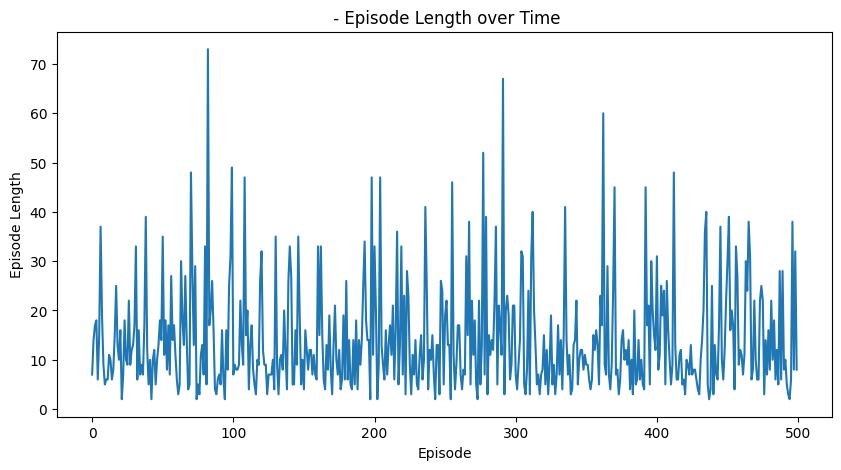

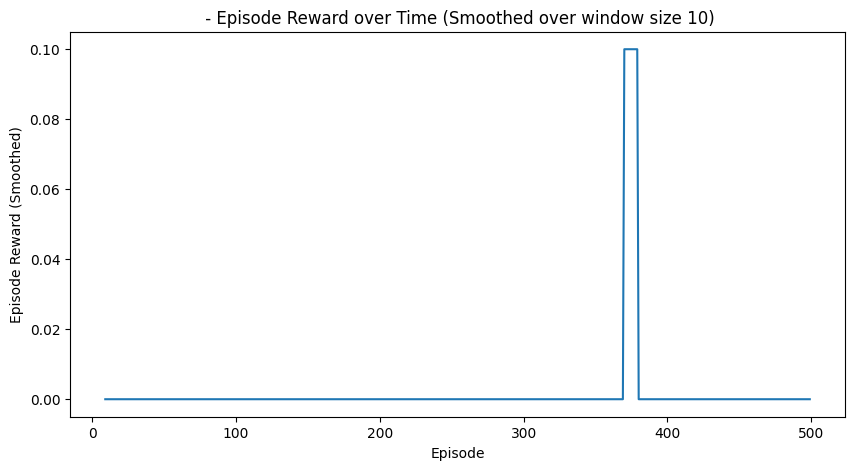

winrate, optimal numsteps = (0.0, nan)
-------------------


Q table we learned for init_method=zeros, n_episodes=1000:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Left,Down,Right,Up,State,best_action
0,0.00,0.0,0.00,0.0,S,Left
1,0.00,0.0,0.00,0.0,F,Left
2,0.00,0.0,0.00,0.0,F,Left
3,0.00,0.0,0.00,0.0,F,Left
4,0.00,0.0,0.00,0.0,F,Left
5,0.00,0.0,0.00,0.0,H,
6,0.00,0.0,0.00,0.0,F,Left
7,0.00,0.0,0.00,0.0,H,
8,0.00,0.0,0.00,0.0,F,Left
9,0.00,0.0,0.00,0.0,F,Left


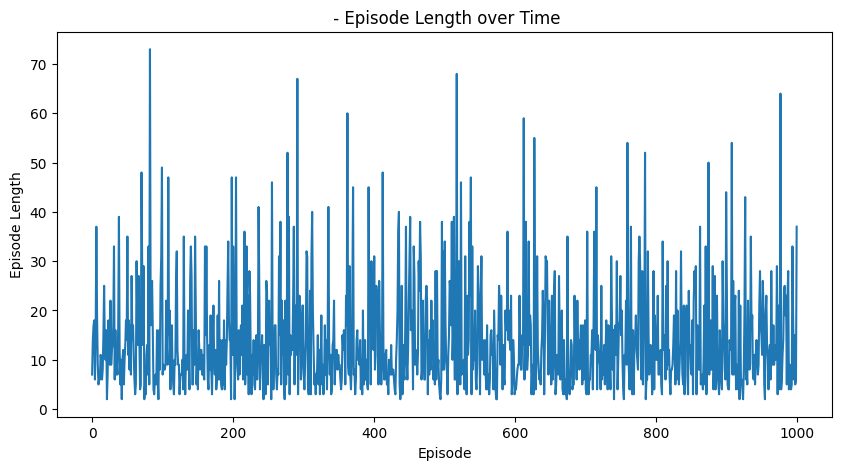

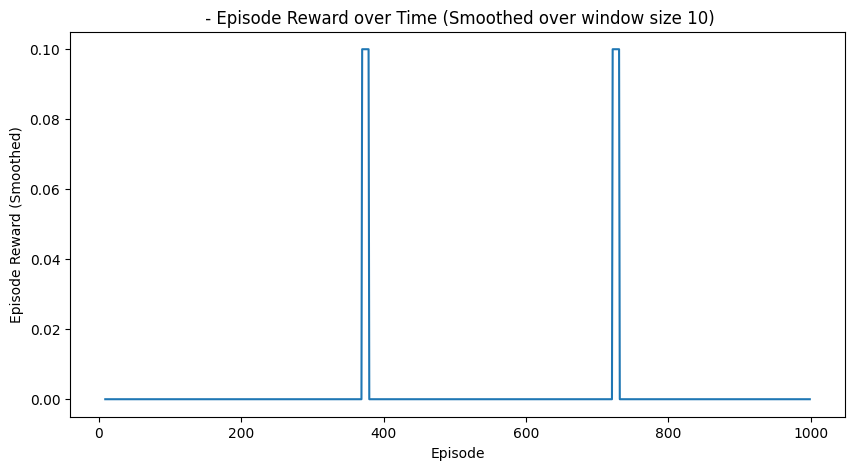

winrate, optimal numsteps = (0.0, nan)
-------------------


Q table we learned for init_method=zeros, n_episodes=5000:


,Left,Down,Right,Up,State,best_action
0,0.27,0.18,0.14,0.10,S,Left
1,0.04,0.08,0.08,0.10,F,Up
2,0.07,0.08,0.09,0.06,F,Right
3,0.06,0.05,0.02,0.07,F,Up
4,0.30,0.27,0.13,0.17,F,Left
5,0.00,0.00,0.00,0.00,H,
6,0.01,0.01,0.13,0.01,F,Right
7,0.00,0.00,0.00,0.00,H,
8,0.21,0.13,0.14,0.39,F,Up
9,0.23,0.37,0.12,0.21,F,Down


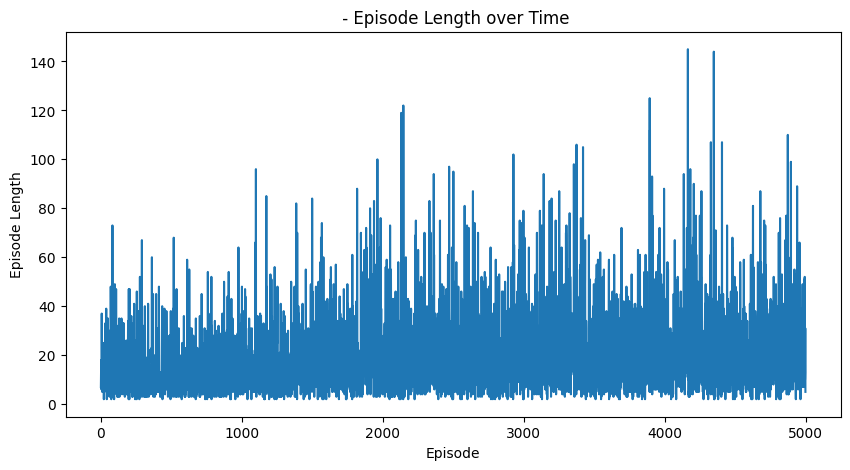

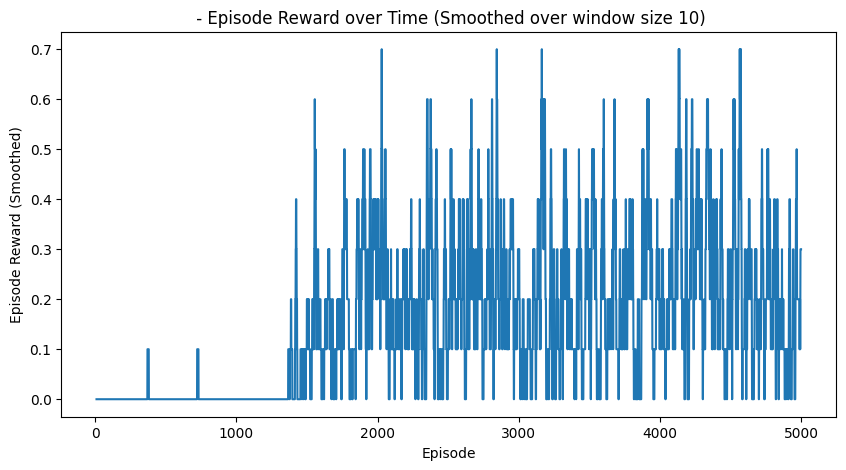

winrate, optimal numsteps = (0.6351, 39.27145331443867)
-------------------


Q table we learned for init_method=zeros, n_episodes=10000:


,Left,Down,Right,Up,State,best_action
0,0.18,0.14,0.09,0.10,S,Left
1,0.09,0.11,0.02,0.11,F,Down
2,0.11,0.09,0.07,0.07,F,Left
3,0.01,0.02,0.06,0.06,F,Right
4,0.26,0.13,0.12,0.05,F,Left
5,0.00,0.00,0.00,0.00,H,
6,0.10,0.00,0.07,0.05,F,Left
7,0.00,0.00,0.00,0.00,H,
8,0.05,0.10,0.02,0.36,F,Up
9,0.24,0.30,0.07,0.04,F,Down


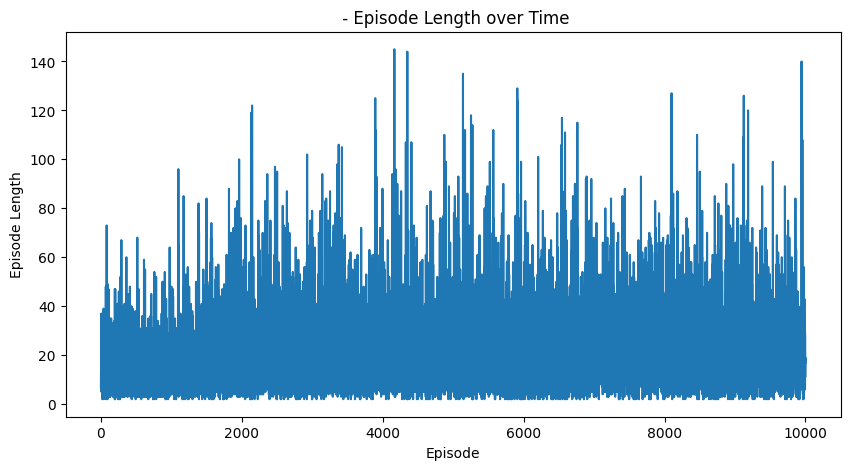

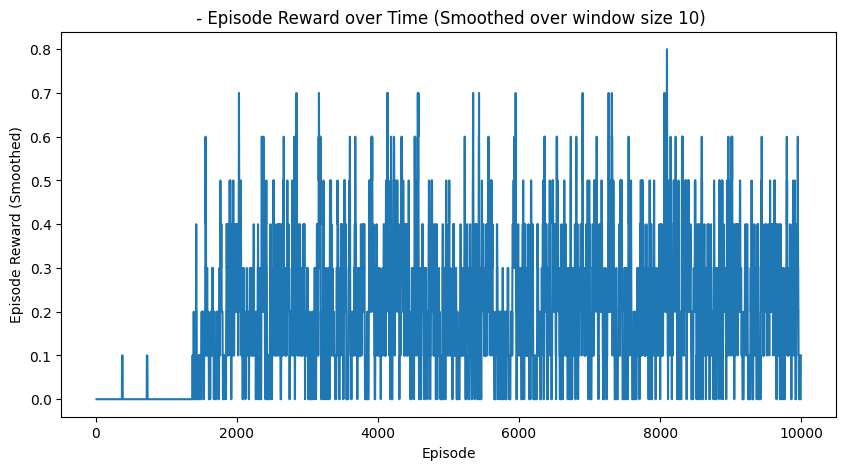

winrate, optimal numsteps = (0.6295, 38.5208895949166)
-------------------



In [59]:
run_experiment(init_method="zeros", show_Q_table=True, show_plot=True)

-------------------- init_method = random --------------------

Q table we learned for init_method=random, n_episodes=500:


,Left,Down,Right,Up,State,best_action
0,0.21,0.22,0.17,0.18,S,Down
1,0.10,0.05,0.12,0.12,F,Right
2,0.06,0.05,0.06,0.09,F,Up
3,0.01,0.04,0.02,0.08,F,Up
4,0.29,0.21,0.17,0.07,F,Left
5,0.00,0.00,0.00,0.00,H,
6,0.05,0.00,0.01,0.00,F,Left
7,0.00,0.00,0.00,0.00,H,
8,0.18,0.17,0.04,0.36,F,Up
9,0.13,0.60,0.06,0.17,F,Down


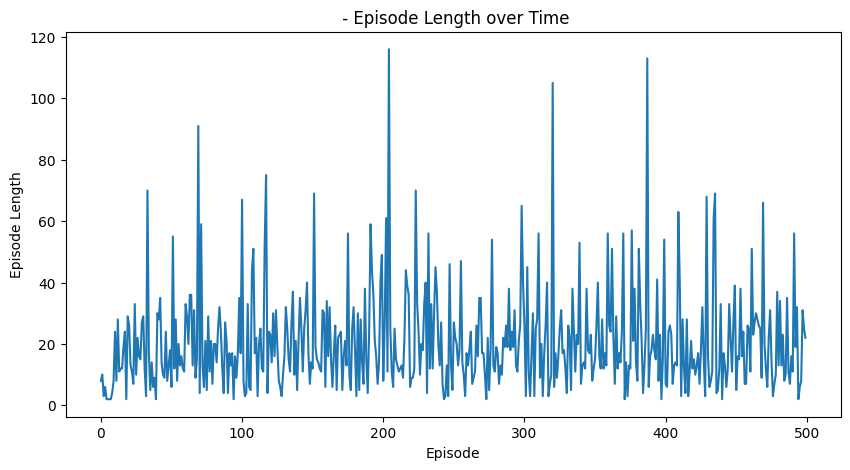

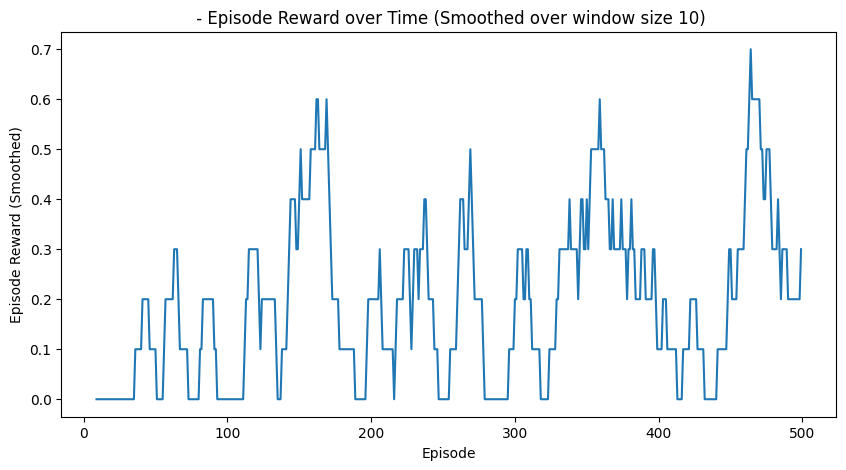

winrate, optimal numsteps = (0.1359, 19.747608535688006)
-------------------


Q table we learned for init_method=random, n_episodes=1000:


,Left,Down,Right,Up,State,best_action
0,0.30,0.13,0.17,0.23,S,Left
1,0.04,0.03,0.08,0.19,F,Up
2,0.13,0.06,0.06,0.08,F,Left
3,0.03,0.03,0.05,0.06,F,Up
4,0.37,0.06,0.18,0.18,F,Left
5,0.00,0.00,0.00,0.00,H,
6,0.02,0.17,0.11,0.01,F,Down
7,0.00,0.00,0.00,0.00,H,
8,0.24,0.11,0.23,0.47,F,Up
9,0.39,0.46,0.20,0.24,F,Down


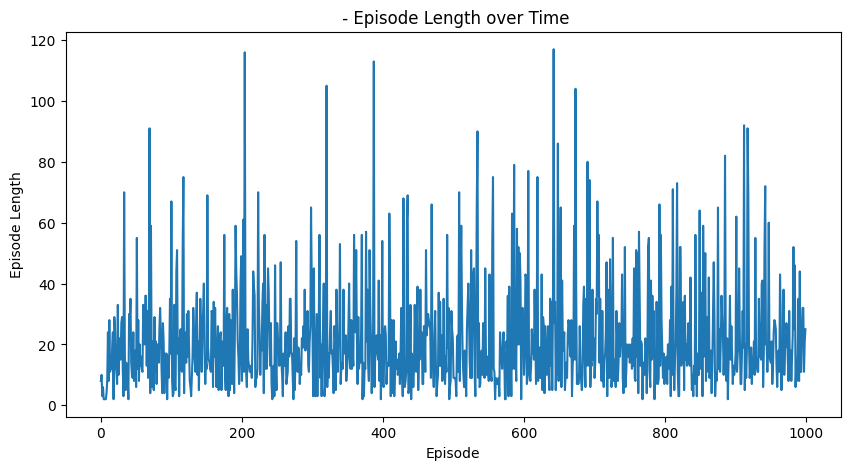

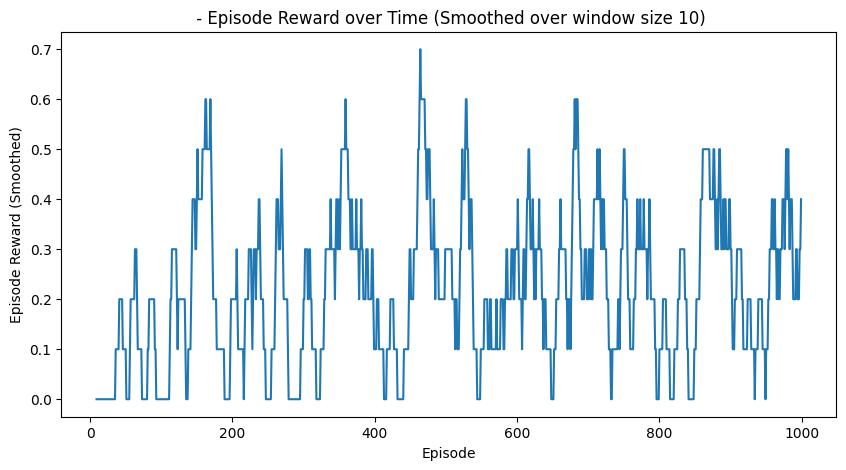

winrate, optimal numsteps = (0.6979, 40.08998423842957)
-------------------


Q table we learned for init_method=random, n_episodes=5000:


,Left,Down,Right,Up,State,best_action
0,0.22,0.17,0.19,0.15,S,Left
1,0.05,0.09,0.10,0.15,F,Up
2,0.06,0.10,0.10,0.08,F,Down
3,0.03,0.05,0.07,0.09,F,Up
4,0.23,0.21,0.08,0.22,F,Left
5,0.00,0.00,0.00,0.00,H,
6,0.02,0.02,0.03,0.03,F,Right
7,0.00,0.00,0.00,0.00,H,
8,0.10,0.06,0.09,0.22,F,Up
9,0.23,0.24,0.16,0.21,F,Down


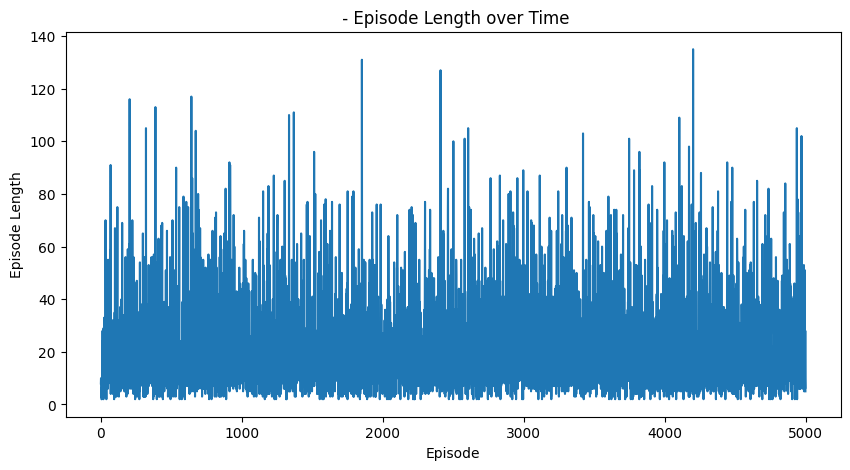

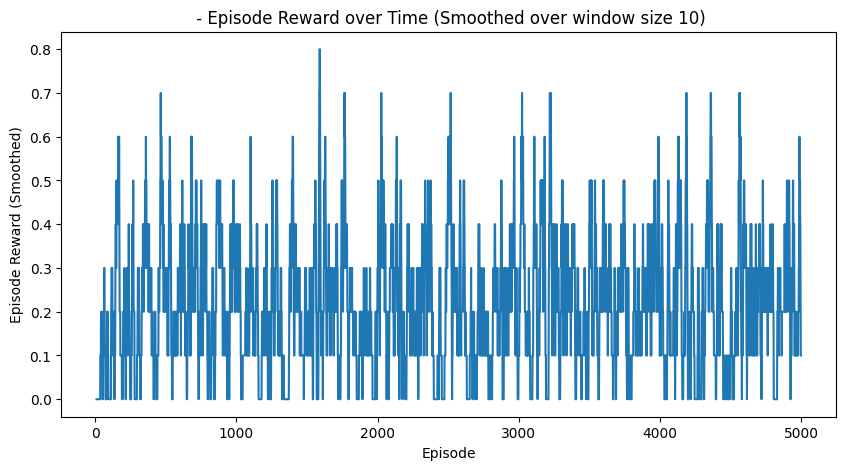

winrate, optimal numsteps = (0.5184, 35.93711419753087)
-------------------


Q table we learned for init_method=random, n_episodes=10000:


,Left,Down,Right,Up,State,best_action
0,0.15,0.12,0.09,0.09,S,Left
1,0.07,0.03,0.07,0.09,F,Up
2,0.10,0.08,0.07,0.08,F,Left
3,0.04,0.04,0.07,0.08,F,Up
4,0.22,0.11,0.09,0.10,F,Left
5,0.00,0.00,0.00,0.00,H,
6,0.22,0.01,0.04,0.00,F,Left
7,0.00,0.00,0.00,0.00,H,
8,0.13,0.08,0.02,0.30,F,Up
9,0.20,0.33,0.21,0.17,F,Down


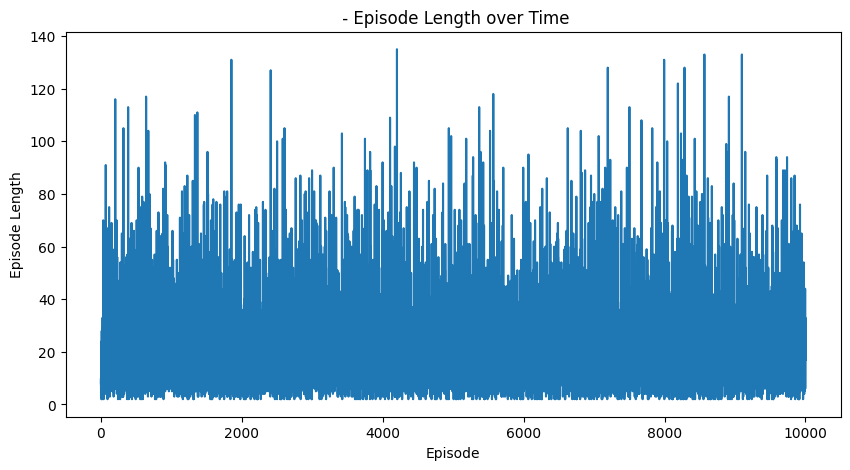

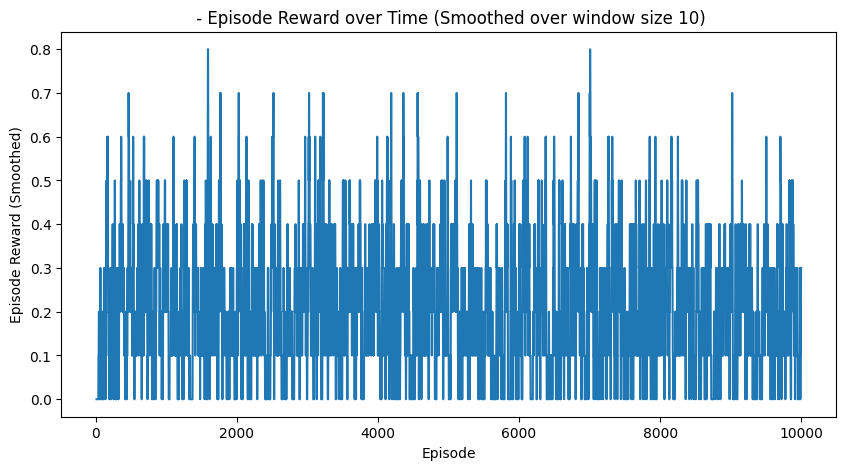

winrate, optimal numsteps = (0.6371, 48.47700517972061)
-------------------



In [60]:
## run another experiment with random initialization
run_experiment(init_method="random", show_Q_table=True, show_plot=True)

## **2.6 Short answer:** Q table initialization *(5 pts)*

From the results abow, what have you observed?

    Hint: How zero initialization performs when we only use 500 episodes. Does it help if we increase num_episodes?
    Similarly for random initialization, then compare the 2.
    

Write your answer in this block

**Answer:**

From the results, we can observe that zero initialization performs poorly when the number of episodes is small (500). With a Q-table initialized to zeros, the agent starts with no prior knowledge and must "explore" to learn the optimal routes. As a result, rewards are low, and episode lengths remain highly variable in the early stages. However, as the number of episodes increases (e.g., 5000 or 10,000), performance improves significantly. The agent has more time to update the Q-table, leading to slightly shorter episode lengths and more consistent rewards as it learns an effective policy. Zero initialization benefits greatly from a large number of episodes.

Random initialization shows slightly better performance with a small number of episodes (500). The initial randomness in the Q-table introduces variability in action selection, promoting exploration in the early episodes. This leads to slightly higher rewards and shorter episode lengths compared to zero initialization when training is limited to 500 episodes. However, as the number of episodes increases, the improvement rate for random initialization becomes similar to zero initialization. Both methods eventually converge to an optimal policy with sufficient training.

## **2.7 (Bonus)** reward *(10 pts)*


So far, if we reach "G", we get a reward of 1, otherwise 0.
The length of the path makes no difference in terms of reward values (i.e., as long as you reach G without falling into H, we get 1).

Now, similar to question 2.4, but we change the reward a bit:
Let's say we get 1 if reaching "G", "-1" if falling into "H", and a small penalty, such as "-0.001" (play around with this) for "F" to discourage it wandering around.

You will need to complete `q_learning_bonus()` below. You can copy your solution from 2.4, and modify the `reward` part before updating values of Q table.



In [61]:
def q_learning_bonus(env, init_method, random_seed, penalty, alpha=0.5, gamma=0.95, epsilon=0.1, num_episodes=500):
    env.action_space.seed(random_seed)
    np.random.seed(random_seed)

    ###### Your code in this block ---------------------------------

    ## Init Q table, reuse 2.3
    Q = question_2_3_initialize_Q_table(env, init_method, random_seed)


    # Keeps track of learning process
    stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    for i in range(num_episodes):

        state, prob = env.reset(seed=i)

        ## set random seed to reproduce the results
        np.random.seed(i+3)
        env.action_space.seed(i+4)
        random.seed(i+5)


        steps = 0
        terminated = False
        while not terminated:

            ## Re-use code from question 2.4
            ##### [YOUR CODE]

            # Epsilon-greedy action selection (reuse 2.4 logic)
            if np.random.rand() < 1 - epsilon:
                action = np.argmax(Q[state])
            else:
                action = env.action_space.sample()

            next_state, reward, terminated, truncated, info = env.step(action)

            if reward == 0:
                reward -= penalty

            best_next_action = np.argmax(Q[next_state])
            td_target = reward + gamma * Q[next_state, best_next_action]
            Q[state, action] += alpha * (td_target - Q[state, action])

            state = next_state
            ## End of your code ---------------------------------------



            ## Update statistics
            steps += 1
            stats.episode_rewards[i] += reward
            stats.episode_lengths[i] = steps

    return Q, stats




-------------------- init_method = random --------------------

Q table we learned for init_method=random, n_episodes=10000:


,Left,Down,Right,Up,State,best_action
0,0.17,0.14,0.16,0.16,S,Left
1,0.00,0.11,0.06,0.12,F,Up
2,0.08,0.08,0.05,0.11,F,Up
3,0.06,0.05,0.04,0.10,F,Up
4,0.19,0.16,0.14,0.10,F,Left
5,0.00,0.00,0.00,0.00,H,
6,0.00,0.00,0.00,0.07,F,Up
7,0.00,0.00,0.00,0.00,H,
8,0.17,0.11,0.06,0.25,F,Up
9,0.26,0.32,0.12,0.13,F,Down


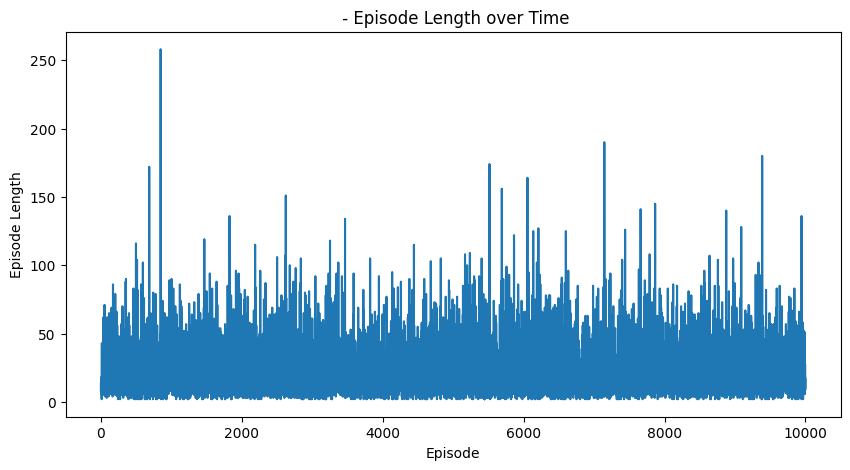

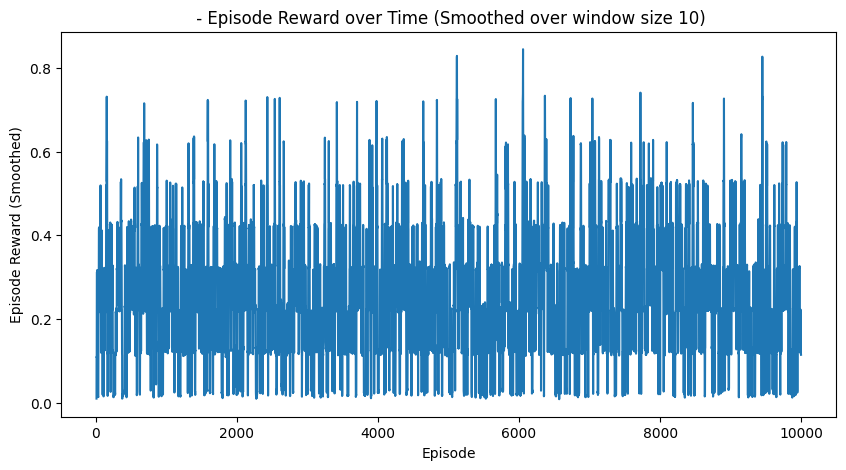

winrate, optimal path length = (0.4571, 38.51345438634872)
-------------------



In [62]:
## Test your function

def run_experiment_bonus(init_method, penalty, show_Q_table: bool= True, show_plot: bool= True):
    """
        you don't need to modify this function
    """

    random_seed = 112022
    n_trials = 10000
    num_episodes_list = [10000]
    env = gym.make("FrozenLake-v1").unwrapped


    print(f"{'-'*20} init_method = {init_method} {'-'*20}")
    for n_episodes in num_episodes_list:

        Q, stats = q_learning_bonus(env, penalty = penalty, init_method=init_method, random_seed=random_seed, num_episodes=n_episodes,)

        run_name = f"{init_method}_{n_episodes}"

        winning_rate = question_2_5_winrate(Q, env, n_trials)

        print(f"\nQ table we learned for init_method={init_method}, n_episodes={n_episodes}:")
        show_table(Q, env)
        plot_episode_stats(stats)

        print(f"winrate, optimal path length = {winning_rate}\n-------------------\n")

init_method = "random"
penalty = -0.001
run_experiment_bonus(init_method=init_method, penalty=penalty)


**What effect does it seem to have on the win rate and on the optimal path length?**

Your Answer:

Adding penalties in Q-learning improves the agent’s ability to avoid undesired states, such as falling into holes, by discouraging inefficient exploration. Compared to experiments without penalties, the episode lengths stabilize more quickly, and rewards become more consistent over time. The penalty mechanism accelerates learning by guiding the agent to prioritize productive actions, leading to fewer inefficient behaviors and faster convergence to an effective policy. This is particularly evident in the reduced peaks in episode lengths and the smoother reward trends compared to the random baseline and earlier Q-learning experiments without penalties.

------------

# **Question 3.** Attention  (*25 total points*)

In this question we will look at how we can apply the attention mechanism to a CNN model. We will reuse the MNIST dataset from question 1. In this question we will look at how using attention mechanism with a basic CNN network can affect the performance of our classification task.

## **3.1 Code:** Basic Attention *(10 pts)*

In this question we will provide you with the BasicCNN network that you will work with.

Let us first look at how attention is calculated:

![alt text](https://github.com/ellywang66/CS541/raw/main/attention.png)

For the attention mechanism, the components $Q$, $K$, and $V$ represent the **query**, **key**, and **value** matrices, derived from the input data. Below is a breakdown of each step:

- **$QK^T$**:computes a **similarity score matrix** by taking the dot product between each query and key vector. This matrix measures how each element (token) should focus on every other element in the input sequence.

- **$\sqrt{d_k}$**: Dividing by the square root of $d_k$ scales down the dot product values to stabilize the training process by preventing large values and avoid gradient explosion.

- **softmax**: The softmax function is applied to the scaled similarity scores by converting each value into probability.

- **$V$**: multiply attention weight by $V$ to compute the final attention output.

For basic attention it will attend to elements in one sequence based on their relevance to a specific context or query where 𝑄
 comes from the target sequence and 𝐾,𝑉 are from the source sequence.For this uestion we will simply let query be a **learnable parameter**.

In [63]:
# the BasicCNN model
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        return x

In [64]:
import torch
import torch.nn as nn
import torch.optim as optim

# Complete SimpleAttention
class BasicAttention(nn.Module):
    def __init__(self, query_dim, key_dim, value_dim, output_dim):
        super(BasicAttention, self).__init__()

        ## TODO: initialize the query,key and value using linear layers where both the input and output dimension is 128.

        super(BasicAttention, self).__init__()

        self.query_layer = nn.Linear(query_dim, 128)
        self.key_layer = nn.Linear(key_dim, 128)
        self.value_layer = nn.Linear(value_dim, 128)
        self.output_layer = nn.Linear(128, output_dim)


    def forward(self, query_input, key_input, value_input):
        ## TODO: calculate Q, K, and V using  query_input, key_input, value_input.
        Q = self.query_layer(query_input)
        K = self.key_layer(key_input)
        V = self.value_layer(value_input)

        #calculate attention score
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / (Q.size(-1) ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)

        # apply attention weights to V
        attention_output = torch.matmul(attention_weights, V)

        #return attention output
        output = self.output_layer(attention_output)

        return output


class CNNWithBasicAttention(nn.Module):
    def __init__(self):
        super(CNNWithBasicAttention, self).__init__()
        self.cnn = BasicCNN()
        ## TODO: initialize self.attention where query, key, value and output dimension are all 128.
        self.attention = BasicAttention(query_dim=128, key_dim=128, value_dim=128, output_dim=128)

        # Initialize a learnable query vector for basic attention
        self.query_vector = nn.Parameter(torch.randn(1, 128))

        ## Initialize final fully connected layer for the classification head using linear layer.
        self.fc = nn.Linear(128, 10)  # Assuming 10 classes for classification


    def forward(self, x):
         ## TODO: we will pass the input x through cnn followed by the attention layer and the fully connected layer
        cnn_output = self.cnn(x)

        batch_size = cnn_output.size(0)
        query_input = self.query_vector.expand(batch_size, -1)
        key_input = cnn_output
        value_input = cnn_output

        attention_output = self.attention(query_input, key_input, value_input)

        x = self.fc(attention_output)

        return x

In [65]:
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')


def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

We can now test the performance of our model

In [66]:
# Train and evaluate the model
model = CNNWithBasicAttention()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_model(model, train_loader, criterion, optimizer, epochs=5)
test_model(model, test_loader)

Epoch 1/5, Loss: 2.2781
Epoch 2/5, Loss: 2.1737
Epoch 3/5, Loss: 2.1310
Epoch 4/5, Loss: 2.1282
Epoch 5/5, Loss: 2.1228
Test Accuracy: 19.84%


## **3.2 Code:** Self-Attention *(10 pts)*

In self attention the attention score is computed solely based on the input sequence without additional learned parameters. The attention socre is computed solely based on the input sequence without any additional learned parameters.

In [76]:


# Step 2: Define a Self-Attention Layer
class SelfAttention(nn.Module):
    def __init__(self, input_dim):
        super(SelfAttention, self).__init__()
        ## TODO: initialize the query,key and value using linear layers where both the input and output dimension is 128.
        self.query_layer = nn.Linear(input_dim, 128)
        self.key_layer = nn.Linear(input_dim, 128)
        self.value_layer = nn.Linear(input_dim, 128)


    def forward(self, x):
        ## TODO: calculate Q, K, and V using  query_input, key_input, value_input.
        Q = self.query_layer(x)  # [batch_size, seq_len, 128]
        K = self.key_layer(x)    # [batch_size, seq_len, 128]
        V = self.value_layer(x)  # [batch_size, seq_len, 128]
        # calculate attention score
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / (Q.size(-1) ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)
        # multiply attention scores by the value matrix
        attention_output = torch.matmul(attention_weights, V)

        # return attention output
        return attention_output



class CNNWithSelfAttention(nn.Module):
    def __init__(self):
        super(CNNWithSelfAttention, self).__init__()
        # Initialize BasicCNN (unchangeable)
        self.cnn = BasicCNN()  # Assume BasicCNN outputs [batch_size, 128]

        ## TODO: initialize self.attention where the input dimension 128.
        self.projection_layer = nn.Linear(128, 128)
        self.attention = SelfAttention(input_dim=128)

        ## Initialize final fully connected layer for the classification head using linear layer.
        self.fc = nn.Linear(128, 10)


    def forward(self, x):
         ## TODO: we will pass the input x through cnn followed by the attention layer and the fully connected layer
        cnn_output = self.cnn(x)
        cnn_output = self.projection_layer(cnn_output)
        cnn_output = cnn_output.unsqueeze(1)
        attention_output = self.attention(cnn_output)
        pooled_output = attention_output.mean(dim=1)
        output = self.fc(pooled_output)
        return output


# Instantiate and train the model
model = CNNWithSelfAttention()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [77]:
# Run training and testing
train_model(model, train_loader, criterion, optimizer, epochs=5)
test_model(model, test_loader)

Epoch 1/5, Loss: 0.1358
Epoch 2/5, Loss: 0.0472
Epoch 3/5, Loss: 0.0374
Epoch 4/5, Loss: 0.0268
Epoch 5/5, Loss: 0.0222
Test Accuracy: 98.93%


## **3.3 Short answer:** Basic attention vs self-attention *(5 pts)*

Compare the performance of basic attention and self-attention. Which one do you think performs better and why?

Write your answer in this block

**Answer:**

It is clear that the self attenton model performed drastically better. THe model had much less loss, and its 98.93% accuracy is signifacntly better than the basic attention's 19.84% accuracy. Self-attention allows the model to identify complex patterns across different parts of the image, resulting in a deeper understanding of the data. In contrast, basic attention's limited focus on predefined interactions probably led the model to generalize, contributing to its poor performance. Therefore, self-attention performs better in this case due to its superior capacity for capturing global context and learning richer feature representations.